In [3]:
# Mehnet VARAN

# -*- coding: utf-8 -*-
"""
@author: mehmet
"""
# importion libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [5]:
# reading the data
data = pd.read_csv('teutancitypowerconsumption.csv')
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [6]:
# exploring the dataset
print("Shape of the dataset",data.shape)

Shape of the dataset (52416, 9)


In [10]:
print("Datatypes of the datas in the dataset")
print(data.dtypes)

Datatypes of the datas in the dataset
DateTime                      object
Temperature                  float64
Humidity                     float64
Wind Speed                   float64
general diffuse flows        float64
diffuse flows                float64
Zone 1 Power Consumption     float64
Zone 2  Power Consumption    float64
Zone 3  Power Consumption    float64
dtype: object


In [11]:
print("First 10 rows of the dataset")
print(data.head(10))

First 10 rows of the dataset
        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   
5  1/1/2017 0:50        5.853      76.9       0.081                  0.059   
6  1/1/2017 1:00        5.641      77.7       0.080                  0.048   
7  1/1/2017 1:10        5.496      78.2       0.085                  0.055   
8  1/1/2017 1:20        5.678      78.1       0.081                  0.066   
9  1/1/2017 1:30        5.491      77.3       0.082                  0.062   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69

In [14]:
print("Statistical datas of the dataset")
print(data.describe())

Statistical datas of the dataset
        Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.46

<Figure size 640x480 with 0 Axes>

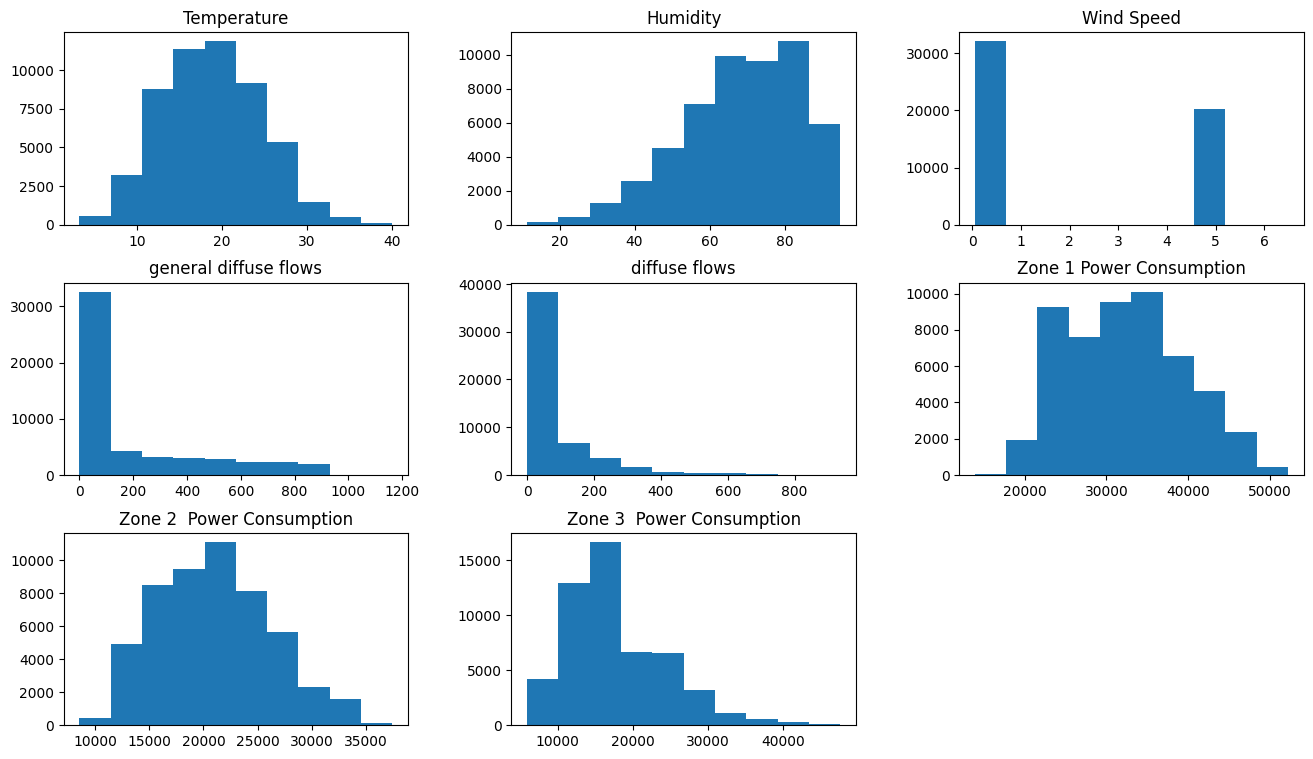

<Figure size 640x480 with 0 Axes>

In [39]:
# plotting the variables in the dataset
data.hist(bins=10,figsize=(16,9),grid=False)
plt.figure()

<Axes: >

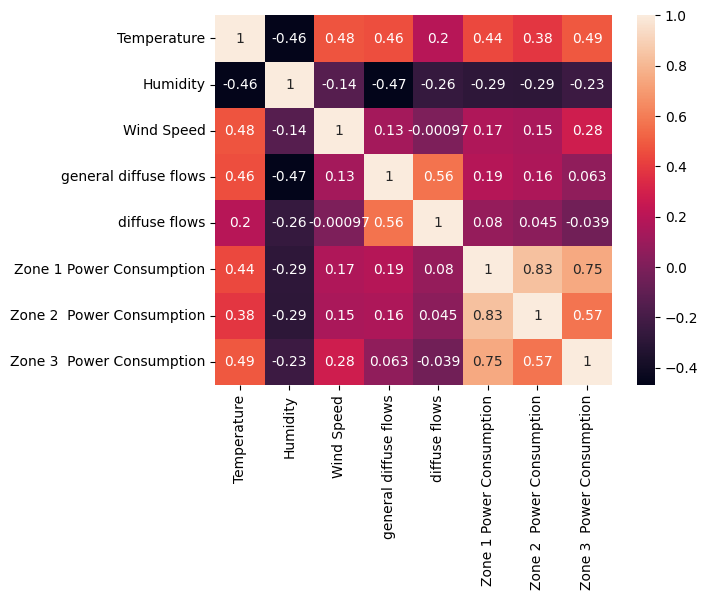

In [41]:
# plotting correlation matrix
corr = data.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, annot=True)

In [22]:
# getting temperature(y) value
temperature = data.iloc[:,1:2]

In [24]:
# doing backward elimination using p value
import statsmodels.api as sm
X = np.append(arr= np.ones((52416,1)).astype(int), values = data, axis = 1)
X_l = data.iloc[:,[2,3,4,5,6,7,8]].values
X_l = np.array(X_l, dtype=float)
model = sm.OLS(temperature,X_l).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Temperature   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          1.490e+05
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                        0.00
Time:                        14:12:23   Log-Likelihood:                     -1.5091e+05
No. Observations:               52416   AIC:                                  3.018e+05
Df Residuals:                   52409   BIC:                                  3.019e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
# removing x4 and doing backward elimination again
X = np.append(arr= np.ones((52416,1)).astype(int), values = data, axis = 1)
X_l = data.iloc[:,[2,3,4,6,7,8]].values
X_l = np.array(X_l, dtype=float)
model = sm.OLS(temperature,X_l).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Temperature   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          1.738e+05
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                        0.00
Time:                        14:13:17   Log-Likelihood:                     -1.5091e+05
No. Observations:               52416   AIC:                                  3.018e+05
Df Residuals:                   52410   BIC:                                  3.019e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
# getting necessary variables and scaling the datas
x = data.iloc[:,[2,3,4,6,7,8]]
ss = preprocessing.StandardScaler()
rescaledX = ss.fit_transform(x)

In [27]:
# splitting the datas
x_train, x_test, y_train, y_test = train_test_split(rescaledX,temperature, test_size= 0.20, random_state=12)

In [30]:
# linear regression model and metrics
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

import sklearn.metrics as sm
print("Linear Regression Scores")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 3))

Linear Regression Scores
Mean absolute error = 3.123
Mean squared error = 15.037
Median absolute error = 2.709
Explain variance score = 0.547


In [32]:
# decision tree model and metrics
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(x_train, y_train)
y_pred = r_dt.predict(x_test)

print("Decision Tree Regression Scores")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 3))

Decision Tree Regression Scores
Mean absolute error = 1.493
Mean squared error = 6.936
Median absolute error = 0.46
Explain variance score = 0.791


In [42]:
# support vector machine model and metrics
from sklearn import svm
svm_model = svm.SVR()
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
print("SVM Regression Scores")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 3))

C:\Users\mehme\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Regression Scores
Mean absolute error = 2.423
Mean squared error = 10.051
Median absolute error = 1.923
Explain variance score = 0.697


In [43]:
# sgd modeli ve metrikleri
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)
print("SGD Regression Scores")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 3))

SGD Regression Scores
Mean absolute error = 3.129
Mean squared error = 15.062
Median absolute error = 2.72
Explain variance score = 0.547


C:\Users\mehme\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=12)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
print("Random Forest Regression Scores")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 3))

C:\Users\mehme\AppData\Local\Temp\ipykernel_13536\3263745782.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,y_train)


Random Forest Regression Scores
Mean absolute error = 1.196
Mean squared error = 3.118
Median absolute error = 0.737
Explain variance score = 0.906


C:\Users\mehme\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


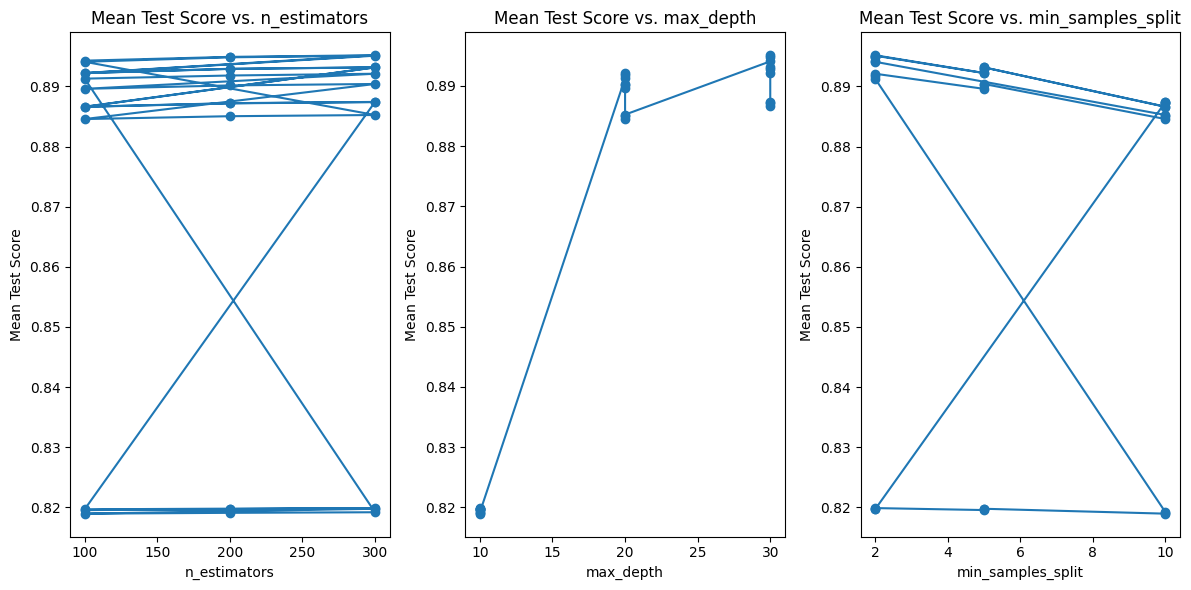

In [45]:
# parameter tuning for random forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    # Add more hyperparameters to tune if desired
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting n_estimators vs. mean_test_score
plt.subplot(1, 3, 1)
plt.plot(results_df['param_n_estimators'], results_df['mean_test_score'], marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs. n_estimators')

# Plotting max_depth vs. mean_test_score
plt.subplot(1, 3, 2)
plt.plot(results_df['param_max_depth'], results_df['mean_test_score'], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs. max_depth')

# Plotting min_samples_split vs. mean_test_score
plt.subplot(1, 3, 3)
plt.plot(results_df['param_min_samples_split'], results_df['mean_test_score'], marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs. min_samples_split')

plt.tight_layout()
plt.show()

In [54]:
# getting bes parameters
best_model = grid_search.best_estimator_
print(best_model)
print("Best model score:", best_model.score(x_test, y_test))

RandomForestRegressor(n_estimators=300, random_state=12)
Best model score: 0.9066422280776454


In [55]:
# training rf with optimized parameters
rf_opt = RandomForestRegressor(n_estimators=300, random_state=12)
rf_opt.fit(x_train, y_train)
y_pred = rf_opt.predict(x_test)
print("Optimized Random Forest Regression Scores")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 3))

C:\Users\mehme\AppData\Local\Temp\ipykernel_13536\780746597.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_opt.fit(x_train, y_train)


Optimized Random Forest Regression Scores
Mean absolute error = 1.191
Mean squared error = 3.097
Median absolute error = 0.739
Explain variance score = 0.907
